In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

#### 2-1 세대별 방의 개수

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train["room_household"] = train["total_rooms"] / train["households"]
test["room_household"] = test["total_rooms"] / test["households"]

#### 2-2 세대별 bedrooms

In [6]:
train["bedrooms_household"] = train["total_bedrooms"] / train["households"]
test["bedrooms_household"] = test["total_bedrooms"] / test["households"]

#### 2-3 세대별 인구수

In [7]:
train["population_household"] = train["population"] / train["households"]
test["population_household"] = test["population"] / test["households"]

#### 2-4 bedrooms와 rooms를 비교했을 때 어떤 것이 집값에 더 영향을 미칠까?

In [8]:
corr_matrix_train = train.corr()
corr_matrix_train["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.691871
room_household          0.150081
total_rooms             0.130991
housing_median_age      0.106758
households              0.061031
total_bedrooms          0.045783
population             -0.027850
population_household   -0.042764
longitude              -0.044982
bedrooms_household     -0.045668
latitude               -0.144917
Name: median_house_value, dtype: float64

* total_rooms             0.130991
* total_bedrooms          0.045783
* rooms이 집값에 영향을 더 미치는 것 같다.

#### ★2-5 침실이 가장 많은 위치는 어디인가?
#### ★2-6 중위 소득이 가장 높은 지역은 어디일까?

In [9]:
sel = ['total_rooms', 'total_bedrooms', 'population']

temp_train = train[ sel  ]

print("데이터 가공 셋의 크기 : ", temp_train.shape)
print("데이터 가공 셋의 일부 : ")
print(temp_train.head()) 

데이터 가공 셋의 크기 :  (17000, 3)
데이터 가공 셋의 일부 : 
   total_rooms  total_bedrooms  population
0       5612.0          1283.0      1015.0
1       7650.0          1901.0      1129.0
2        720.0           174.0       333.0
3       1501.0           337.0       515.0
4       1454.0           326.0       624.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='population'>

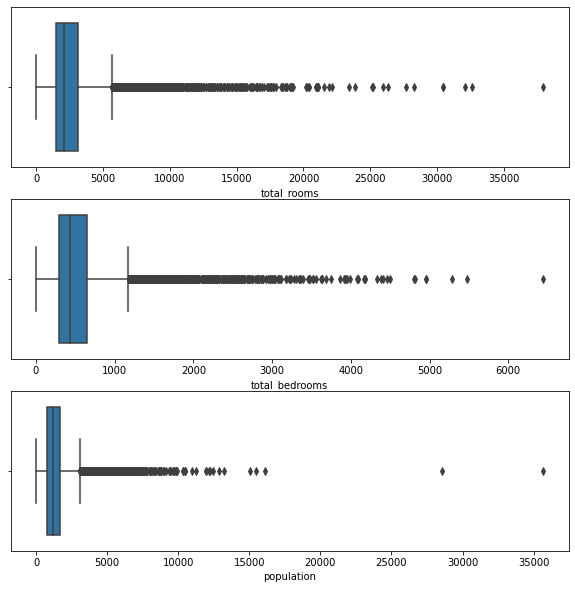

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1) 
sns.boxplot(x="total_rooms", data=temp_train)

plt.subplot(3,1,2) 
sns.boxplot(x="total_bedrooms", data=temp_train)

plt.subplot(3,1,3) 
sns.boxplot(x="population", data=temp_train) 

<AxesSubplot:xlabel='median_house_value'>

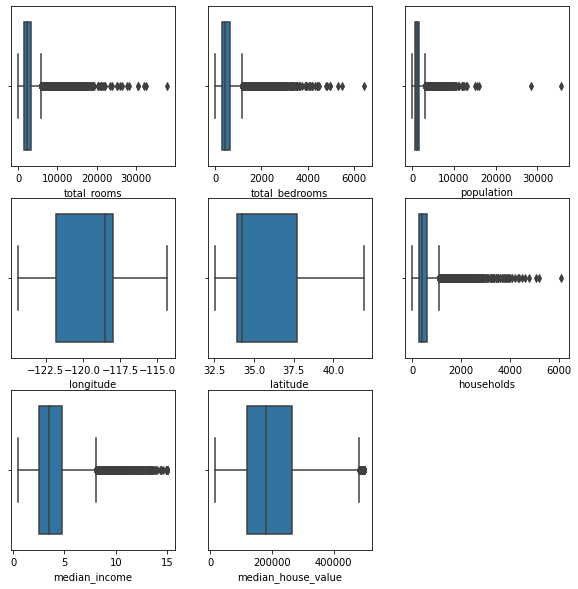

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1) 
sns.boxplot(x="total_rooms", data=train)
plt.subplot(3,3,2) 
sns.boxplot(x="total_bedrooms", data=train)
plt.subplot(3,3,3) 
sns.boxplot(x="population", data=train)  

plt.subplot(3,3,4) 
sns.boxplot(x="longitude", data=train)
plt.subplot(3,3,5) 
sns.boxplot(x="latitude", data=train)
plt.subplot(3,3,6) 
sns.boxplot(x="households", data=train)  

plt.subplot(3,3,7) 
sns.boxplot(x="median_income", data=train)
plt.subplot(3,3,8) 
sns.boxplot(x="median_house_value", data=train)

In [13]:
train.loc[ train['total_rooms']>= 3152 , "total_rooms_level"] = 1
train.loc[ (train['total_rooms']> 2127) & (train['total_rooms'] <= 3151) , "total_rooms_level"] = 2
train.loc[ (train['total_rooms']> 1462) & (train['total_rooms'] <= 2127) , "total_rooms_level"] = 3
train.loc[ train['total_rooms'] <= 1462 , "total_rooms_level"] = 4
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household,total_rooms_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220,2.150424,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832,2.438445,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179,2.846154,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150,2.278761,3.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275,2.381679,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751,2.457995,2.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484,2.567742,2.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474,2.728070,2.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812,2.715481,2.0


#### 3-1 total_bedrooms도 4그룹으로 만들어서 새로운 컬럼을 생성해 보기.

In [14]:
## 1그룹 : 648~
## 2그룹 : 435~648
## 3그룹 : 298~434
## 4그룹 : 1 ~ 297

train.loc[ train['total_bedrooms']>= 648 , "total_bedrooms_level"] = 1
train.loc[ (train['total_bedrooms']> 434) & (train['total_bedrooms'] <= 648) , "total_bedrooms_level"] = 2
train.loc[ (train['total_bedrooms']> 297) & (train['total_bedrooms'] <= 434) , "total_bedrooms_level"] = 3
train.loc[ (train['total_bedrooms']<= 297) , "total_bedrooms_level"] = 4

#### 3-4 (추가) median_income을 10그룹으로 만들어서 새로운 컬럼을 생성.

In [15]:
# 1구간 : ~ 0.5
# 2구간 : 0.5~1 만달러
# 3구간 : 1.0~1.5
# 4구간 : 1.5~2.0
# 5구간 : 2.0~2.5
# 6구간 : 2.5~3.0
# 7구간 : 3.0~3.5
# 8구간 : 3.5~4.0
# 9구간 : 4.0~4.5
#10구간 : 4.5~
train.loc[ train['median_income']>= 4.5 , "median_income_level"] = 10
train.loc[ (train['median_income']> 4.0) & (train['median_income'] <= 4.5) , "median_income_level"] = 9
train.loc[ (train['median_income']> 3.5) & (train['median_income'] <= 4.0) , "median_income_level"] = 8
train.loc[ (train['median_income']> 3.0) & (train['median_income'] <= 3.5) , "median_income_level"] = 7
train.loc[ (train['median_income']> 2.5) & (train['median_income'] <= 3.0) , "median_income_level"] = 6
train.loc[ (train['median_income']> 2.0) & (train['median_income'] <= 2.5) , "median_income_level"] = 5
train.loc[ (train['median_income']> 1.5) & (train['median_income'] <= 2.0) , "median_income_level"] = 4
train.loc[ (train['median_income']> 1.0) & (train['median_income'] <= 1.5) , "median_income_level"] = 3
train.loc[ (train['median_income']> 0.5) & (train['median_income'] <= 1.0) , "median_income_level"] = 2
train.loc[ (train['median_income']<= 0.5) , "median_income_level"] = 1
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household,total_rooms_level,total_bedrooms_level,median_income_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220,2.150424,1.0,1.0,3.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832,2.438445,1.0,1.0,4.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179,2.846154,4.0,4.0,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150,2.278761,3.0,3.0,7.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275,2.381679,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751,2.457995,2.0,3.0,5.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484,2.567742,2.0,2.0,6.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474,2.728070,2.0,2.0,7.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812,2.715481,2.0,2.0,4.0


<AxesSubplot:xlabel='total_rooms_level', ylabel='median_house_value'>

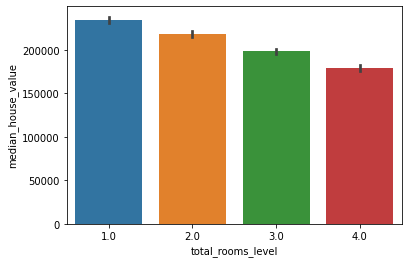

In [16]:
import seaborn as sns

sns.barplot(x='total_rooms_level', y='median_house_value', data=train )

<AxesSubplot:xlabel='total_bedrooms_level', ylabel='median_house_value'>

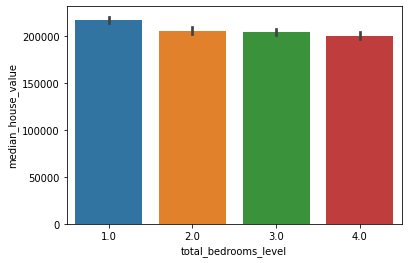

In [17]:
sns.barplot(x='total_bedrooms_level', y='median_house_value', data=train )

In [18]:
train.corr()['median_house_value']

longitude              -0.044982
latitude               -0.144917
housing_median_age      0.106758
total_rooms             0.130991
total_bedrooms          0.045783
population             -0.027850
households              0.061031
median_income           0.691871
median_house_value      1.000000
room_household          0.150081
bedrooms_household     -0.045668
population_household   -0.042764
total_rooms_level      -0.178247
total_bedrooms_level   -0.049419
median_income_level     0.587353
Name: median_house_value, dtype: float64

In [19]:
train.groupby('total_rooms_level').count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household,total_bedrooms_level,median_income_level
total_rooms_level,,,,,,,,,,,,,,
1.0,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250
2.0,4247,4247,4247,4247,4247,4247,4247,4247,4247,4247,4247,4247,4247,4247
3.0,4249,4249,4249,4249,4249,4249,4249,4249,4249,4249,4249,4249,4249,4249
4.0,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254


#### 3-6 실습 확인 - groupby
#### 3-7 실습 확인 - totalbedroom - groupby로 묶어서 출력해 보기.